In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_validate
from warnings import filterwarnings
filterwarnings('ignore')

## 앙상블 학습의 유형: 보팅(Voting), 배깅(Bagging), 부스팅(Boosting), 스태킹(Stacking) 등

#### 보팅: 
- 여러 종류의 알고리즘을 사용한 각각의 결과에 대해 투표를 통해 최종 결과를 예측하는 방식

#### 배깅
- bagging은 bootstrap aggregating의 줄임말
- bootstrap:모집단의 성질에 대해 표본을 통해 추정할 수 있는 것처럼, 표본의 성질에 대해서도 재표집(resampling)을 통해 추정할 수 있다는 것이다. 즉 주어진 표본(샘플)에 대해서, 그 샘플에서 또 다시 샘플(재표본)을 여러번(1,000~10,000번, 혹은 그 이상)추출하여 표본의 평균이나 분산 등이 어떤 분포를 가지는가를 알아낼 수 있다.(위키피디아)
- 같은 알고리즘에 대해 데이터 샘플을 다르게 두고 학습을 수행해 보팅을 수행하는 방식
- 이 때의 데이터 샘플은 중첩이 허용된다. => 복원추출!! 즉 10000개의 데이터에 대해 10개의 알고리즘이 배깅을 사용할 때,각 1000개의 데이터 내에는 중복된 데이터가 존재할 수 있다. 배깅의 대표적인 방식이 Random Forest
#### => 의사결정나무에 배깅을 적용한 것이 Random Forest

#### 부스팅:
- 여러 개의 알고리즘이 순차적으로 학습을 하되, 앞에 학습한 알고리즘 예측이 틀린 데이터에 대해 올바르게 예측할 수 있도록, 그 다음번 알고리즘에 가중치를 부여하여 학습과 예측을 진행하는 방식(Ada)과 잔여오차를 계산해서 학습(gradient)


( 부스팅 알고리즘은 대표적으로 아래와 같은 알고리즘들이 있음)
- AdaBoost
- Gradient Booting Machine(GBM)
- XGBoost
- LightGBM
- CatBoost


# Voting

- 각각의 모델에서 나온 결과가 더 많은 거 hard voting
- 확률로 따지는 것이 soft voting

In [2]:
bcancer =  load_breast_cancer()

In [3]:
x_data = bcancer['data']
y_data = bcancer['target']

In [4]:
# train set, test set 나누기

x_train, x_test, y_train, y_test = train_test_split(bcancer['data'], bcancer['target'], test_size=0.2, 
                                                    random_state=11, stratify=bcancer['target'])

- 교차검증도 추가적으로 해 주자!

In [5]:
# estimators : list of (str, estimator) tuples
# hard voting이 디폴트 ( soft voting이 조금더 낫다라는 얘기가..)
# voting : {'hard', 'soft'}, default='hard'

model_logi = LogisticRegression()
model_knn = KNeighborsClassifier()
model_tree = DecisionTreeClassifier()

model_vote = VotingClassifier( estimators=[('LogisticRegression', model_logi), ('knn', model_knn), ('tree', model_tree)] )

# model_vote.fit(x_train, y_train)
cross_val =cross_validate( model_vote, x_train, y_train, cv =5)
print( cross_val )
model_vote.fit( x_train, y_train)

{'fit_time': array([0.03291225, 0.02792525, 0.0289228 , 0.02992058, 0.0289228 ]), 'score_time': array([0.00398946, 0.00398922, 0.00398922, 0.00299168, 0.00498676]), 'test_score': array([0.93406593, 0.94505495, 0.97802198, 0.92307692, 0.94505495])}


VotingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('tree', DecisionTreeClassifier())])

In [6]:
# 예측결과 출력 - hard voting 방식!!

model_vote.predict(x_test)

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0])

- 각각의 모델의 예측 결과를 확인해 보자!

In [7]:
# 로지스틱

model_logi.fit(x_train, y_train)
model_logi.predict(x_test)

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0])

In [8]:
# kNN

model_knn.fit(x_train, y_train)
model_knn.predict(x_test)

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0])

In [9]:
# 의사결정나무

model_tree.fit(x_train, y_train)
model_tree.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0])

- 정확도

In [10]:
model_vote.score(x_test, y_test)

0.9210526315789473

In [11]:
# 로지스틱 정확도

model_logi.score(x_test, y_test)

0.9122807017543859

In [12]:
# KNN이 채택됨을 알 수 있음

model_knn.score(x_test, y_test)

0.9122807017543859

In [13]:
# 의사결정나무

model_tree.score(x_test, y_test)

0.9122807017543859

In [14]:
# c.__class__.__name__ => 각각의 이름을 출력

for c in [model_logi, model_knn, model_tree]:
    c.fit(x_train, y_train)
    print(c.__class__.__name__ , c.score(x_test, y_test))

LogisticRegression 0.9122807017543859
KNeighborsClassifier 0.9122807017543859
DecisionTreeClassifier 0.9035087719298246


# <연습문제>

## 3개의 분류 클래스를 이용하여 soft voting으로 정확도를 구하시오.

In [15]:
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [16]:
wine =  load_wine()

In [17]:
x_data = wine['data']
y_data = wine['target']

In [18]:
# train set, test set 나누기

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, 
                                                    random_state=11, stratify=wine['target'])

In [19]:
model_logi = make_pipeline(StandardScaler(), LogisticRegression( multi_class='multinomial' ))
model_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
model_tree = make_pipeline(StandardScaler(), DecisionTreeClassifier())

model_vote = VotingClassifier(estimators=[('logi', model_logi), ('knn', model_knn), 
                                          ('tree', model_tree)], voting='soft')

model_vote.fit(x_train, y_train)

VotingClassifier(estimators=[('logi',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('logisticregression',
                                               LogisticRegression(multi_class='multinomial'))])),
                             ('knn',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('kneighborsclassifier',
                                               KNeighborsClassifier())])),
                             ('tree',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('decisiontreeclassifier',
                                               DecisionTreeClassifier())]))],
                 voting='soft'

In [20]:
for c in [model_logi, model_knn, model_tree] :
    c.fit(x_train, y_train)
    print(c.__class__.__name__, c.score(x_test, y_test))

Pipeline 0.9722222222222222
Pipeline 0.9444444444444444
Pipeline 0.9444444444444444


# Bagging

In [21]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_validate

In [22]:
model_pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [23]:
# bootstrap=True : 복원추출
# n_estimators=10 : 10개의 KNeighborsClassifier => 10개의 결과 값이 나오면 투표를 통해서 결정
# max_samples : 하나의 예측기에 들어가는 샘플들이 랜덤하게 들어가는데 랜덤하게 몇 %씩 들어가는 것의 한계값을 결정하는 것
#               => 줄일수록 서로 다른 것들을 배운 예측기들이 모일 수 있는 가능성이 높아짐

# 정수는 몇 개를 추출할 거냐
# 실수는 확률

model_bagg = BaggingClassifier( model_pipe_knn, n_estimators=10,  max_samples=0.5 )
# model_bagg.fit(x_train, y_train)



In [24]:
model_cross = cross_validate(model_bagg, x_train, y_train, cv=5)

In [25]:
print(model_cross['test_score'].mean())

0.9647783251231526


In [26]:
model_bagg.fit(x_train, y_train)

BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('kneighborsclassifier',
                                                  KNeighborsClassifier())]),
                  max_samples=0.5)

In [27]:
model_bagg.predict(x_test)

array([0, 0, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0,
       2, 2, 0, 1, 2, 2, 0, 0, 2, 1, 2, 0, 0, 2])

In [28]:
model_bagg.score(x_test, y_test)

0.9444444444444444

# 랜던 포레스트: 의사결정나무에 Bagging을 적용한 것
### 모델의 분산을 줄여 일반적으로 Bagging 보다 성능이 좋음

In [29]:
forest = RandomForestClassifier()

In [30]:
forest.fit(x_train, y_train)

RandomForestClassifier()

In [31]:
forest.score(x_test, y_test)

1.0

# Boosting
### 오분류된 데이터에 초점을 맞추어 더 많은 가중치를 주는 방식

In [32]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

### 1. AdaBoost

In [33]:
tree = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=1 )
model_ada = AdaBoostClassifier( tree )
model_ada.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=1,
                                                         random_state=1))

In [34]:
model_ada.predict(x_test)

array([1, 1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0,
       1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 2, 0, 1, 1])

In [35]:
model_ada.score(x_test, y_test)

0.8888888888888888

# <연습문제>

## cancer 데이터 셋을 이용하여 logistic에 bagging과 boosting을 적용하여 정확도를 구하고 ROC curve를 그리시오. - ROC는 이진 데이터만 가능!

In [36]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [37]:
cancer_df = pd.DataFrame(cancer.data)
cancer_df.columns = cancer['feature_names']
cancer_df['diagnosis'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [38]:
x_data = cancer_df.iloc[:, :-1]
y_data = cancer_df.iloc[:, -1]

In [39]:
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, random_state=1, stratify = y_data)

### 1. Bagging

In [40]:
model_pipe_logi = make_pipeline(StandardScaler(), LogisticRegression())
model_bagg = BaggingClassifier( model_pipe_logi, n_estimators=10,  max_samples=0.5 )
model_cross = cross_validate(model_bagg, x_train, y_train, cv=5)

In [41]:
model_bagg.fit(x_train, y_train)

BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('logisticregression',
                                                  LogisticRegression())]),
                  max_samples=0.5)

In [42]:
model_bagg.predict(x_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1])

- 정확도

In [43]:
model_bagg.score(x_test, y_test)

0.9736842105263158

In [44]:
proba = model_bagg.predict_proba(x_test)
proba

array([[9.41272637e-02, 9.05872736e-01],
       [9.38718943e-01, 6.12810567e-02],
       [1.46017889e-01, 8.53982111e-01],
       [2.70969140e-03, 9.97290309e-01],
       [9.99386278e-01, 6.13722271e-04],
       [2.70528928e-03, 9.97294711e-01],
       [3.10970044e-03, 9.96890300e-01],
       [4.72091729e-03, 9.95279083e-01],
       [9.99999495e-01, 5.05251869e-07],
       [1.92933435e-03, 9.98070666e-01],
       [4.56862500e-01, 5.43137500e-01],
       [1.63829848e-02, 9.83617015e-01],
       [4.40899596e-05, 9.99955910e-01],
       [9.20683120e-01, 7.93168799e-02],
       [2.42154212e-03, 9.97578458e-01],
       [2.99259516e-03, 9.97007405e-01],
       [7.11839511e-02, 9.28816049e-01],
       [9.99955400e-01, 4.46001455e-05],
       [7.19192090e-04, 9.99280808e-01],
       [8.42859893e-01, 1.57140107e-01],
       [2.51441938e-03, 9.97485581e-01],
       [4.38263507e-01, 5.61736493e-01],
       [1.31675122e-03, 9.98683249e-01],
       [1.86765360e-02, 9.81323464e-01],
       [4.214746

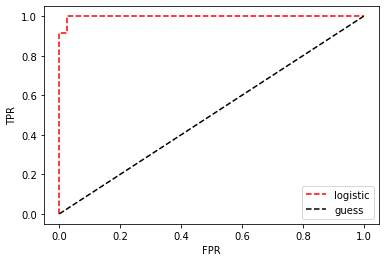

In [45]:
# ROC curve
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

fpr, tpr, threasholds = metrics.roc_curve(y_test, proba[:,1])
plt.plot( fpr, tpr, 'r--',label='logistic')
plt.plot( [0,1], [0,1], 'k--', label='guess')
plt.xlabel( 'FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

### 2. Boosting

In [50]:
# 아예 정규화된 데이터를 줘야함

model_logi =  LogisticRegression()
model_ada = AdaBoostClassifier( model_logi )
model_cross = cross_validate(model_ada, x_train, y_train, cv=5)

In [51]:
model_ada.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression())

In [52]:
model_ada.predict(x_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1])

- 정확도

In [53]:
model_ada.score(x_test, y_test)

0.956140350877193

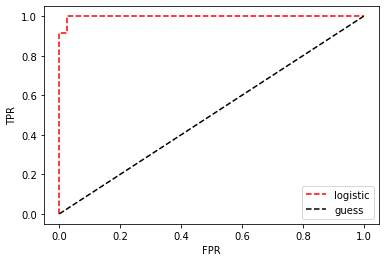

In [54]:
# ROC curve
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

proba = model_bagg.predict_proba(x_test)
fpr, tpr, threasholds = metrics.roc_curve(y_test, proba[:,1])
plt.plot( fpr, tpr, 'r--',label='logistic')
plt.plot( [0,1], [0,1], 'k--', label='guess')
plt.xlabel( 'FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

# # 한꺼번에 - Voting으로 가장 좋은거를 찾자!

In [55]:
models = [('ada', AdaBoostClassifier()),
          ('bc', BaggingClassifier()),
         ('logi', LogisticRegression()),
         ('tree', DecisionTreeClassifier()),
          ('knn', KNeighborsClassifier())
         ]

model_vote = VotingClassifier(models, voting='soft')
model_vote.fit(x_train, y_train)

VotingClassifier(estimators=[('ada', AdaBoostClassifier()),
                             ('bc', BaggingClassifier()),
                             ('logi', LogisticRegression()),
                             ('tree', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [56]:
model_vote.score(x_test, y_test)

0.9736842105263158